<a href="https://colab.research.google.com/github/aeksei/PY200_Spring_2021/blob/master/lesson_1/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Объектно-ориентированное программирование (ООП) на языке Python

* Основы ООП
* Понятие класса, объекта
* Создание экземпляра класса

##  Основы объектно-ориентированного программирования (ООП)

Язык Python является **мультипарадигменным** языком.  

**Парадигма программирования** — это совокупность идей и понятий, определяющих стиль написания компьютерных программ. 


До этого работа строилась в ключе **функционального подхода**. Такого способа выстраивания своей программы, которая складывалась из отдельных функций.

### Модель стакана

Давайте запрограммируем модель стакана с водой. Материал стакана нам пока что не важен.  
![glass.png](https://novgazeta.by/upload/iblock/dce/dce5704239ff9af56884b942cf2d135d.jpg)
1. Какие характеристики позволяют описать стакан с водой?
2. Как на языке программирования Python описать эту модель с точки зрения удобства работы с ней? 

In [ ]:
# Модель стакана с водой
glass = {
    'capacity_volume': 0,  # объем стакана
    'occupied_volume': 0  # занятый объем
}

Переменная `glass` - модель или объект. Объект - это то над чем мы будем выполнять все операции.  
Содержимое словаря - описание модели или его схема.  

Вероятнее всего мы будем делать много разных стаканов, поэтому напишем функцию `init`, которая будет "создавать" стаканы.

**Init** - (от англ. initialization) - инициализация, создание, подготовка к работе)

In [5]:
def init(capacity_volume: int, occupied_volume: int) -> dict:
    """
    Создание и подготовка к работе объекта "Стакан"
    
    :param capacity_volume: Объем стакана
    :param occupied_volume: Объем занимаемой жидкости
    :return: Инициализированный словарь
    """
    glass = {
        'capacity_volume': capacity_volume,  # объем стакана
        'occupied_volume': occupied_volume  # занятый объем
    }

    return glass


### Логика модели на основе функционального подхода

"Создадим" стакан и наполним его жидкостью...

In [6]:
# Создаём "словарь-стакан", в котором есть два элемента: 
# объём и количество занимаемой жидкости
glass = init(500, 0)

print(glass)

{'capacity_volume': 500, 'occupied_volume': 0}


In [7]:
# Добавляем ещё 400 мл
glass['occupied_volume']  = glass['occupied_volume']  + 400

print(glass)

{'capacity_volume': 500, 'occupied_volume': 400}


Добавим ещё немного воды...

In [8]:
# Добавляем ещё 200 мл
glass['occupied_volume'] += 200

print(glass)

{'capacity_volume': 500, 'occupied_volume': 600}


Упс, объём воды в стакане больше, чем занимаемый объем стакана :((  
Как решить это вопрос?

#### Добавление воды

Создадим функцию `add_water_to_glass`, которая будет уметь работь со стаканом и реализовывать логику добавления в него воды

In [9]:
def add_water_to_glass(glass: dict, water: int) -> int:
    """
    Добавление воды в стакан. 
    
    Если количество добавляемой жидкости превышает доступное место, 
    то возвращается количество непоместившейся жидкости
    
    :param glass: Объект стакан
    :param water: Объем добавляемой жидкости
    :return: Объем непоместившейся жидкости
    """
    delta = glass['capacity_volume'] - glass['occupied_volume']

    if delta < water:
        glass['occupied_volume'] = glass['capacity_volume']
        return water - delta
    else:
        glass['occupied_volume'] += water
        return 0
    

Воспользуемся данной функцией для проверки работы со стаканом

In [10]:
# Инициализируем стакан
glass = init(500, 0)

In [11]:
# Добавляем в него воду
remaning_liquid = add_water_to_glass(glass, 200)

In [12]:
# Стакан полностью заполнен водой
print("Стакан:", glass)

Стакан: {'capacity_volume': 500, 'occupied_volume': 200}


In [13]:
# Оставшаяся вода, которая не влезла в стакан 
print("Оставшаяся вода:", remaning_liquid)

Оставшаяся вода: 0


In [14]:
add_water_to_glass(glass, 500)

200

In [15]:
# Стакан полностью заполнен водой
print("Стакан:", glass)

Стакан: {'capacity_volume': 500, 'occupied_volume': 500}


Теперь с точки зрения логики, корректно обрабатывается добавление воды в стакан.  
А что будет, если передать не стакан???

#### Проверка модели

Переменная `glass` является словарём `dict`.  
Как проверить, что с точки зрения логики выполнения приложения переменная `glass` является объектом типа "Стакан"?

Можем написать функцию `is_glass`, которая будет проверять является ли словарь стаканом.

In [17]:
def is_glass(glass: dict) -> bool:
    """
    Функция которая проверяет является ли словарь стаканом
    
    :param glass: Объект стакан
    :return: Является ли объект стаканом или нет
    """
    return True if 'capacity_volume' in glass and 'occupied_volume' in glass else False

Тогда функция добавления будет иметь "защиту от дурака"

In [20]:
def add_water_to_glass(glass: dict, water: int) -> int:
    """
    Добавление воды в стакан. 
    
    Если количество добавляемой жидкости превышает доступное место, 
    то возвращается количество непоместившейся жидкости
    
    :param glass: Объект стакан
    :param water: Объем добавляемой жидкости
    :return: Объем непоместившейся жидкости
    """
    if not is_glass(glass):
        raise TypeError('Объект не стакан')
    
    delta = glass['capacity_volume'] - glass['occupied_volume']
    if delta < water:
        glass['occupied_volume'] = glass['capacity_volume']
        return water - delta
    else:
        glass['occupied_volume'] += water
        return 0

In [21]:
# работа со стаканом
glass = init(500, 0)
add_water_to_glass(glass, 200)

0

In [22]:
print(glass)

{'capacity_volume': 500, 'occupied_volume': 200}


In [23]:
# работа не со стаканом
fake_glass = {
    'length': 50, 
    'weight': 100
}
add_water_to_glass(fake_glass, 200)

TypeError: ignored

#### Извлечение воды

Запишем ещё функцию извлечения воды с учетом проверки типа объекта, с которым она работает

In [24]:
def remove_water_from_glass(glass: dict, estimate_water: int) -> int:
    """
    Извлечение воды из стакана
    
    Если количество извлекаемой жидкости превышает количество воды в стакане,
    то возвращается реальное количество извлеченной воды
    
    :param glass: Объект стакан
    :param estimate_water: Объем извлекаемой жидкости
    :return: Объем реально извлеченной жидкости
    """
    ...

In [25]:
# Количество извлекаемой жидкости меньше наполненности стакана
glass = init(500, 250)
real_remove_water = remove_water_from_glass(glass, 200)

print("Стакан:", glass)
print("Количество действительно извлеченной воды:", real_remove_water)

Стакан: {'capacity_volume': 500, 'occupied_volume': 250}
Количество действительно извлеченной воды: None


In [26]:
# Количество извлекаемой жидкости больше наполненности стакана
glass = init(500, 100)
real_remove_water = remove_water_from_glass(glass, 200)

print("Стакан:", glass)
print("Количество действительно извлеченной воды:", real_remove_water)

Стакан: {'capacity_volume': 500, 'occupied_volume': 100}
Количество действительно извлеченной воды: None


#### Проблемы функционального подхода

Если собрать всё в кучу, то мы имеем следующую картину:
```python
# данные
glass = {
    'capacity_volume' : 500, 
    'occupied_volume' : 0
}

# Функции, оперирующие с моделью стакана с водой:
def is_glass(glass: dict) -> bool:
    ...


def add_water_to_glass(glass: dict, water: int) -> int:
    ...


def remove_water_from_glass(glass: dict, estimate_water: int) -> int:
    ...
```


***Проблема***:  
Функции `is_glass`, `add_water_to_glass` и `remove_water_from_glass` отделены друг от друга. Из **исходного кода** программы неизвестно какие функции можно использовать для управлением объектом типа "Стакан".

***Решение:***  
Совместно определить данные и функции.
```python
# Функции, оперирующие с моделью стакана с водой:
def is_glass(glass: dict) -> bool:
    ...
 
 
def add_water_to_glass(glass: dict, water: int) -> int:
    ...
 
 
def remove_water_from_glass(glass: dict, estimate_water: int) -> int:
    ...

# данные и функции
glass = {
    'capacity_volume': 500,
    'occupied_volume': 0,
    'is_glass': is_glass,  # функция проверки стакана
    'add_water_to_glass': add_water_to_glass,  # функция добавления воды
    'remove_water_from_glass': remove_water_from_glass,  # функция извлечения воды
}
```


In [27]:
# Теперь данные и функции определены совместно
glass = {
    'capacity_volume' : 500, 
    'occupied_volume' : 0,
    'is_glass': is_glass,  # функция проверки стакана
    'add_water_to_glass': add_water_to_glass,  # функция добавления воды
    'remove_water_from_glass': remove_water_from_glass,  # функция извлечения воды
}

print(glass)

{'capacity_volume': 500, 'occupied_volume': 0, 'is_glass': <function is_glass at 0x7f44ea2dc0d0>, 'add_water_to_glass': <function add_water_to_glass at 0x7f44ea2dc048>, 'remove_water_from_glass': <function remove_water_from_glass at 0x7f44ea334268>}


In [28]:
# воспользуемся функцией добавления воды
glass['add_water_to_glass'](glass, 50)

print(glass)

{'capacity_volume': 500, 'occupied_volume': 50, 'is_glass': <function is_glass at 0x7f44ea2dc0d0>, 'add_water_to_glass': <function add_water_to_glass at 0x7f44ea2dc048>, 'remove_water_from_glass': <function remove_water_from_glass at 0x7f44ea334268>}


#### Альтернативное решение с помощью замыкания функций

```python
def init(capacity_volume: int, occupied_volume: int) -> dict:
    
    def is_glass(glass: dict) -> bool:
        ...

    def add_water_to_glass(glass: dict, water: int) -> int:
        ...

    def remove_water_from_glass(glass: dict, estimate_water: int) -> int:
        ...

    return {
        'capacity_volume': capacity_volume,
        'occupied_volume': occupied_volume,
        'is_glass': is_glass,  # функция проверки стакана
        'add_water_to_glass': add_water_to_glass,  # функция добавления воды
        'remove_water_from_glass': remove_water_from_glass,  # функция извлечения воды
    }
```

Теперь все необходимые функции соотнесены с объектом.  
Но проблема в том, что функции `is_glass`, `add_water_to_glass`, `remove_water_from_glass` будут занова создаваться при каждой инициализации стакана...((

#### Вывод

По итогу мы имеет следующую картину:
1. Необходимо явно передавать объект "Стакан"
  ```python
  glass['is_glass'](glass)
  ```
2. Можно передать объект "Нестакан"
3. Требуется в каждой функции проверять тип
переменной `glass`
  ```python
  glass['add_water_to_glass']
  ```
4. Нет строгой привязки исходного кода к логике работы
5. Синтаксис...

### Объектно-ориентированный подход

**Объектно-ориентированное программирование** - это парадигма программирования, основанная на совместном описании данных и операций, оперирующих с этими данными.

> Попробуем написать код, думая о его ремонтопригодности, а не только о том, чтобы он «работал!».  
Код, который поймёт и сможет поддерживать любой (разумеется любой, кто знаком с программированием)



Совместное описание данных и операций можно делать в Python с помощью словарей, но, конечно, необходимо использовать объектно-ориентированный синтаксис.

Вместо этого:
```python
# Функции, оперирующие с моделью стакана с водой:
def is_glass(glass: dict) -> bool:
    ...
 
 
def add_water_to_glass(glass: dict, water: int) -> int:
    ...
 
 
def remove_water_from_glass(glass: dict, estimate_water: int) -> int:
    ...

# данные и функции
glass = {
    'capacity_volume': 500,
    'occupied_volume': 0,
    'is_glass': is_glass,  # функция проверки стакана
    'add_water_to_glass': add_water_to_glass,  # функция добавления воды
    'remove_water_from_glass': remove_water_from_glass,  # функция извлечения воды
}
```

Следует использовать следующий синтаксис:
```python
class Glass:
    def __init__(self, capacity_volume: int, occupied_volume: int):
        self.capacity_volume = capacity_volume
        self.occupied_volume = occupied_volume

    def is_glass(self) -> bool:
        ...

    def add_water_to_glass(self, water: int) -> int:
        ...

    def remove_water_from_glass(self, estimate_water: int) -> int:
        ...
```

Теперь данные и функции определены совместно.

#### Понятие класса и объекта

Класс - это **чертеж**, по которому в дальнейшем создаются изделия.  
Чертёж описывает создаваемое изделие, т.е. его характеристики, размеры, параметры, ...
![Чертеж стакана](http://club.berkovich-zametki.com/wp-content/uploads/2018/03/V.2-3.jpg)

Объект - готовое изделие, выполненное по данному чертежу.

![](https://www.oma.by/upload/Sh/imageCache/bbc/48b/584a82c2baa5fc497b1b12726c086338.jpg) ![](https://www.oma.by/upload/Sh/imageCache/bbc/48b/584a82c2baa5fc497b1b12726c086338.jpg)

Чертеж - один, изделий - много

|        |                   |         |
|:------:|:-----------------:|---------|
| Класс  | Class             | Чертеж  |
| Объект (экземпляр) | Object (instance) | Изделие |


**Класс** (англ. class) - это тип с описанием переменных, свойств и методов.

#### Создание класса

```python
class Glass:
    ...
```
* Ключевое слово **`class`**.  
Данное ключевое слово указывает интерпретатору Python, что далее следует определение класса, а не функции.
*  Имя класса `Glass`.  
Разработчик может выбрать любое имя.

Определение класса - описание внутренних переменных, которые называются атрибутами, и функций, которые называются методами.

***Методы***
```python
str_ = "string"
str_.split()  # split - метод строки

list_ = [1, 5, 3, 7]
list_.sort()  # sort - метод списка
```

***Атрибуты*** 
```python
def func():
    ...

func.attr = 1  # attr - атрибут функции
```

***Атрибуты и методы `Glass`***
```python
class Glass:
    def __init__(self, capacity_volume: int, occupied_volume: int):
        self.capacity_volume = capacity_volume  # self.capacity_volume атрибут
        self.occupied_volume = occupied_volume  # self.occupied_volume атрибут

    # is_glass метод
    def is_glass(self) -> bool:  
        ...

    # add_water_to_glass метод
    def add_water_to_glass(self, water: int) -> int:  
        ...

    # remove_water_from_glass метод
    def remove_water_from_glass(self, estimate_water: int) -> int:  
        ...
```

#### Создание экземпляра класса

За создание экземпляра класса (его инициализацию) отвечает специальный метод `__init__`.  
Данный метод предназначен для инициализации объекта (экземпляра класса) данного класса. Он подготавливает созданный объект к использованию.

In [29]:
class Glass:
    def __init__(self):
        self.capacity_volume = 500
        self.occupied_volume = 0

Чтобы создать экземпляр класса, нужно после названия класса указать круглые скобки
```python
Glass()
```
Всё по аналогии с вызовом функции


In [30]:
# Объекты класса Glass, готовые к использованию

glass_1 = Glass()  # созданный экземпляр класса Glass
glass_2 = Glass()  # второй созданный экземпляр класса Glass

***Аналогия с производством***
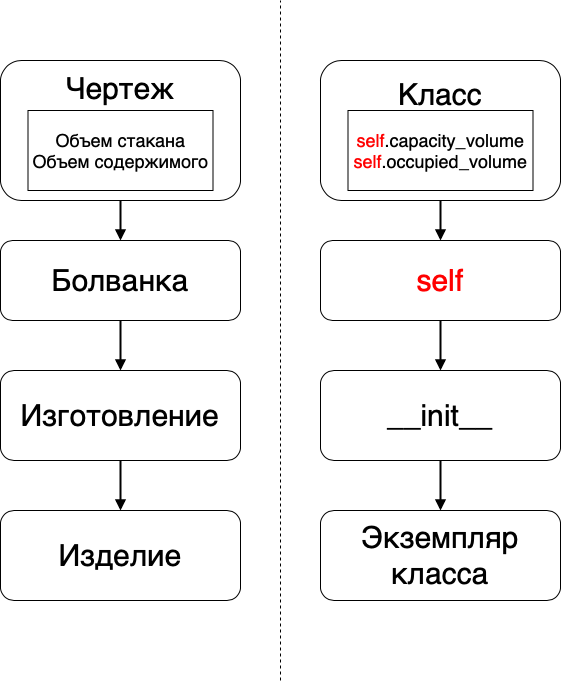

Для изготовления детали необходимо получить болванку, выполнить определенные технологические операции для изготовления детали.

Для создания объекта интерпретатор Python выделяет память под объект и вызывает специальный метод `__init__`.  
В этом методе разработчик описывает все действия, которые необходимы для создания объекта.  
В качестве "болванки" выступает специальная переменная `self` в методе `__init__`.

#### Выводы

1. Класс - это тип с описанием  **атрибутов** (внутренних переменных) и **методов** (внутренних функций)
2. Метод `__init__` не должен возвращать никакой результат.
3. Разработчик не передаёт переменную `self` при создании объекта.
4. Экземпляр класса или объект - это представление в памяти конкретного класса с его атрибутами и методами, сконфигурированного по описанию, заложенному в классе.



### Атрибуты и методы объекта

Доступ к атрибутам и методам экземпляра класса осуществляется по следующему синтаксису:
```python
instance.attr - для атрибута
instance.method() - для методов
```

In [39]:
# Создание класса с атрибутами
class Test:
    def __init__(self):
        self.attr1 = 5  # атрибут
        attr2 = 10  #  локальная переменная метода __init__

    def method_print_attr1(self):
        print(self.attr1)

    def method_print_attr2(self):
        print(attr2)

In [40]:
instance = Test()
print(instance.attr1)

5


In [34]:
instance.method_print_attr1

<bound method Test.method_print_attr1 of <__main__.Test object at 0x7f44ea2d61d0>>

In [35]:
instance.method_print_attr1()

5


In [41]:
instance.method_print_attr2()

NameError: ignored

Чем плох данный подход инициализации объкта?

Вернемся к стакану

```python
class Glass:
    def __init__(self):  # Подготовка созданного объекта к использованию
        self.capacity_volume = 500
        self.occupied_volume = 0

glass_1 = Glass()
glass_2 = Glass()
glass_3 = Glass()
```

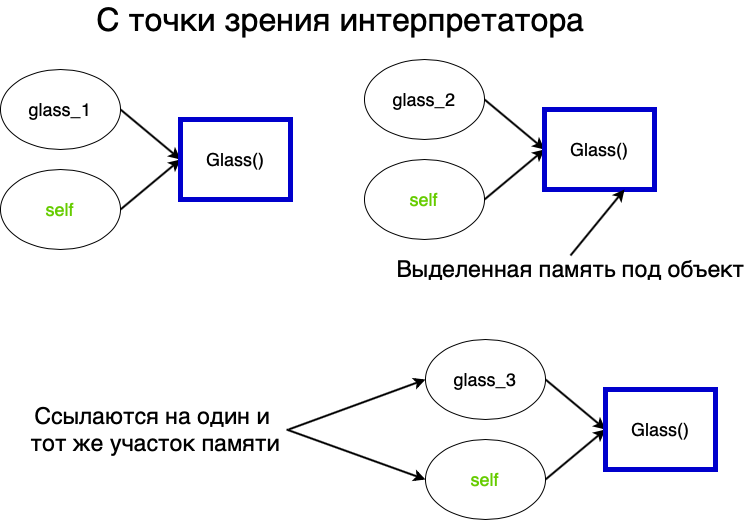

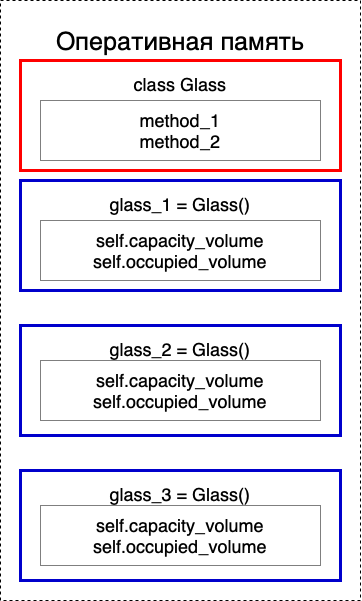

#### Методы экземпляра класса

Давайте чуть глубже разберемся с переменной `self`. Напишем метод, который будет возвращать адрес переменной `self`.  
Для этого воспользуемся функцией встроенной функцией `id` и `hex`.

[Функция id](https://docs.python.org/3/library/functions.html#id)
```python
id(object)
```
Возвращает идентификатор объекта. Это целое число, которое гарантированно будет уникальным и неизменным для этого объекта в течение его времени жизни. 
Два объекта с непересекающимся временем жизни могут иметь одинаковое значение идентификатора.

Детали реализации CPython: это адрес объекта в памяти.

In [ ]:
print(id(5))

10914624


[Функция hex](https://docs.python.org/3/library/functions.html#hex)  
```python
hex(x)
```
Конвертирует число целое число в шестадцатиричный формат записи



In [ ]:
print(hex(255))

0xff


In [47]:
class Glass:
    def get_id(self):  # метод экземпляра класса
        return hex(id(self))

In [48]:
glass_1 = Glass()
print(glass_1.get_id())

0x7f44ea331128


In [49]:
hex(id(glass_1))

'0x7f44ea331128'

In [50]:
hex(id(glass_1)) == glass_1.get_id()

True

In [52]:
glass_2 = Glass()
hex(id(glass_2)) == glass_2.get_id()

True

In [53]:
glass_2.get_id() == glass_1.get_id()

False

In [54]:
glass_1 is glass_2

False

Если заметить `self` на другое название переменной,
то ничего не поменяется.  
`self` - это просто **соглашение** об именовании переменных в Python

Интерпретатору Python абсолютно неважно как называется первая переменная в методе, потому что он её передаёт в качестве аргумента функции.  
А как известно, параметры функции выбирает программист.

In [55]:
class Glass:
    def __init__(self):
        self.occupied_volume = 0

    def get_id(self):  # метод экземпляра класса
        return hex(id(self))

    def add_water(self, water: int) -> None:
        self.occupied_volume += water


glass = Glass()
print(glass.occupied_volume)  # 0

0


In [56]:
glass.add_water(100)
print(glass.occupied_volume)

100


In [59]:
glass_2 = Glass()
print(glass_2.occupied_volume)  # 0

glass_2.add_water(201)
print(glass_2.occupied_volume)

0
201


In [60]:
print(glass.occupied_volume)
print(glass_2.occupied_volume)

100
201


In [61]:
glass.occupied_volume = 1001
print(glass.occupied_volume)

1001


#### Пользовательские атрибуты

Атрибуты объекта можно условно разделить две группы:
- определённые python-ом (такие как `__class__`, `__dict__`) 
- определённые пользователем, о них мы и будем говорить.  

`__dict__` согласно этой классификации, относится к “системным” (определённым python-ом) атрибутам.  
Его задача — хранить **пользовательские атрибуты**. Он представляет собой словарь, в котором:
- ключом является имя_атрибута, 
- значением - значение_атрибута.

In [85]:
class Glass:
    def __init__(self, capacity_volume: int, occupied_volume: int) -> None:
        """
        
        """
        print(self.get__dict__())

        self.capacity_volume = capacity_volume
        self.occupied_volume = occupied_volume

        print(self.get__dict__())

    def get__dict__(self):
        """Метод, возвращающий словарь пользовательских атрибутов"""
        return self.__dict__
 

In [86]:
glass_1 = Glass(500, 100)
# glass_2 = Glass(750, 50)

{}
{'capacity_volume': 500, 'occupied_volume': 100}


In [80]:
print(glass_1.get__dict__())
print(glass_2.get__dict__())

{'capacity_volume': 500, 'occupied_volume': 100}
{'capacity_volume': 750, 'occupied_volume': 50}


In [81]:
print(glass_1.__dict__)
print(glass_2.__dict__)

{'capacity_volume': 500, 'occupied_volume': 100}
{'capacity_volume': 750, 'occupied_volume': 50}


In [82]:
# задать атрибут "на лету"
glass_1.occupied_volume = 1000
glass_2.capacity_volume = 1

print(glass_1.__dict__)
print(glass_2.__dict__)

{'capacity_volume': 500, 'occupied_volume': 1000}
{'capacity_volume': 1, 'occupied_volume': 50}


In [77]:
glass_1.material = 'paper'
glass_2.material2 = 'glass'

print(glass_1.__dict__)
print(glass_2.__dict__)

{'capacity_volume': 500, 'occupied_volume': 1000, 'material': 'paper'}
{'capacity_volume': 1, 'occupied_volume': 50, 'material2': 'glass'}


In [87]:
glass_1.__dict__['attr_from__dict__'] = "Hello, World"
print(glass_1.get__dict__())

{'capacity_volume': 500, 'occupied_volume': 100, 'attr_from__dict__': 'Hello, World'}


In [88]:
print(glass_1.attr_from__dict__)

Hello, World


#### Как правильно инициализировать атрибуты

Попробуем создать класс, описывающий стакан, и реализовать:
- метод, который увеличивает количество воды в стакане
- метод, который возвращает материал стакана

In [99]:
class Glass:
    def __init__(self, capacity_volume: [int, float] = 500, occupied_volume: [int, float] = 0):
        if not isinstance(capacity_volume, (int, float)):
            raise TypeError()
        
        if not capacity_volume > 0:
            raise ValueError()

        self.capacity_volume = capacity_volume  # объем
        self.occupied_volume = occupied_volume  # количество жидкости

    def add_water(self, water: [int, float]):
        delta = self.capacity_volume - self.occupied_volume
        if delta < water:
            self.occupied_volume = self.capacity_volume
            return water - delta
        else:
            self.occupied_volume = self.occupied_volume + water  # self.occupied_volume =+ water 
            return 0

    def get_material(self) -> str:
        return self.material

    def set_material(self, material: str) -> None:
        self.material = material

In [101]:
glass = Glass(500, 0)
glass.__dict__

{'capacity_volume': 500, 'occupied_volume': 0}

In [102]:
glass.get_material()

AttributeError: ignored

In [103]:
glass.set_material('test')
print(glass.get_material())

test


Способы создания атрибутов экземпляра:  
***Плохо :(***
```python
class Glass:
    def __init__(self):
        self.capacity_volume = 500 
        self.occupied_volume = 0

    def init_value(self): 
        self.value = 100
```

***Хорошо :)***
```python
class Glass:
    def __init__(self):
        self.capacity_volume = 500 
        self.occupied_volume = 0
        self.value = 100
```

Если требуется создавать множество атрибутов класса и различные атрибуты, а некоторые атрибуты можно логически объединить, то создание таких атрибутов выносят в отдельные методы, но эти методы ***обязательно*** вызывают в `__init__`.  

***Если очень хочется, то можно ;)***
```python
class Glass:
    def __init__(self):
        self.init_volume() 
        self.init_occupied()

    def init_capacity(self): 
        self.capacity_volume = 500

    def init_occupied(self): 
        self.occupied_volume = 0
```


In [109]:
class Glass:
    """Класс создания стакана"""
    def __init__(self, capacity_volume: [int, float], occupied_volume: [int, float], material=None):
        """Init"""
        self.init_capacity_volume(capacity_volume)
        self.occupied_volume = occupied_volume  # количество жидкости
        self.material = material

    def add_water(self, water: [int, float]):
        """add_water"""
        delta = self.capacity_volume - self.occupied_volume
        if delta < water:
            self.occupied_volume = self.capacity_volume
            return water - delta
        else:
            self.occupied_volume = self.occupied_volume + water  # self.occupied_volume =+ water 
            return 0

    def init_capacity_volume(self, capacity_volume: [int, float]):
        """init_capacity_volume"""
        if not isinstance(capacity_volume, (int, float)):
            raise TypeError()
        
        if not capacity_volume > 0:
            raise ValueError()

        self.capacity_volume = capacity_volume  # объем


In [111]:
help(Glass)

Help on class Glass in module __main__:

class Glass(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, capacity_volume:[<class 'int'>, <class 'float'>], occupied_volume:[<class 'int'>, <class 'float'>], material=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_water(self, water:[<class 'int'>, <class 'float'>])
 |  
 |  init_capacity_volume(self, capacity_volume:[<class 'int'>, <class 'float'>])
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [110]:
glass = Glass(500, 0)
glass.__dict__

{'capacity_volume': 500, 'material': None, 'occupied_volume': 0}

#### Выводы:  

1. Переменная `self` является ссылкой на экземпляр данного класса. `self` - это просто соглашение об именовании переменных в Python
2. Экземпляр класса, или объект (англ. instance) — это представление в памяти конкретного класса с переменными, свойствами и методами, сконструированного по описанию, заложенному в классе.
3. Инициализация (англ. initialization) — присвоение начальных значений полям объекта. В Python за это отвечает специальный метод `__init__`.
4. Метод `__init__` подготавливает объект класса к использованию. Определение всех атрибутов должно находиться в этом методе. Если атрибут отпределяется во внешнем методе, то внешний метод необходимо вызвать в `__init__`

###  Время жизни объекта

#### Конструктор объекта (`__init__`)

Время жизни объекта - это время с момента создания объекта до его уничтожения.  
Объект начинает существовать после успешного завершения `__init__`


In [ ]:
class Glass:
    def __init__(self):
        # верная инициализация

Только в первом случае объект `glass` стал существовать.
В остальных случаях объект не сконструирован (такими объектом пользоваться нельзя).

***Вредные советы:***  
Неверное проектирование `__init__`
```python
class Glass:
    def __init__(self, capacity_volume):
        if not isinstance(capacity_volume, (int, float)):
            return
        if capacity_volume < 0: 
            return
        self.capacity_volume = capacity_volume
```

Пользовать класса не сможет определить успешность создания объекта, потому что `__init__` не бросает исключений.

От исключений в инициализаторе можно отказаться, если требуется реализовать "ленивую" инициализацию.

- В результате вызова `__init__` объект может быть создан или не создан.  
- Пользователь Вашего класса определяет успешность создания объекта отсутствием исключений.  
- Если при создании объекта НЕ было выброшено исключение, то объектом пользоваться можно.  
- Если при создании объекта было выброшено исключение, то объектом пользоваться нельзя.

#### Деструктор объекта (`__del__`)

1. Переменные являются ссылками на объекты
2. При присваивании одной переменной другой переменной просто увеличивается счётчик ссылок

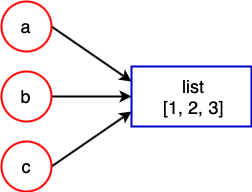

In [ ]:
# Количество ссылок на переменную 

import sys
a = [1, 2, 3]

print(sys.getrefcount(a))

2


Почему 2? Ведь переменная `a` объявлена всего один раз

Если обратиться к документации ([sys.getrefcount](https://docs.python.org/3/library/sys.html#sys.getrefcount))

> Возвращает счетчик ссылок объекта. Возвращаемое количество обычно на единицу больше, чем вы могли ожидать, потому что он включает (временную) ссылку в качестве аргумента для getrefcount().





Деструкция или уничтожение объекта в Python не регламентирована для разработчика, т.е. разработчик **не может вручную удалить объект**  
Разработчик **может лишь удалить ссылку на объект**, но уничтожение объекта будет выполнено сборщиком мусора.

Деструктор определен в методе `__del__` (антипод конструктора `__init__`. И есть втроенный оператор `del`



3


#### Маленькие хитрости при работе интерпретатора

In [ ]:
# Создать объекта с атрибутами


CPython (интерпретатор написанный на C) хранит **глобальный список** всех целых чисел в диапазоне [-5, 256].  
Это также означает, что интерпретатор предварительно выделяет для всех этих целых чисел, даже если вы не используете большинство из них.